In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount("/content/drive")
trainDataset = "Dataset/dataset_train_2024.csv"

In [3]:
dataModulations = pd.read_csv(trainDataset)
dataModulations.drop(columns = ['Unnamed: 0'], inplace = True)

# Feature Analysis

# Exploring the dataset

The data represents I/Q samples of a modulated wireless signal measured within a time window of 128 µs.

Each signal is modulated with one of these schemes:
* 8PSK
* BPFSK
* CPFSK
* GFSK
* QPSK

Sampling the signals at a rate of 1MSamp/s, each example includes **128 In-phase**, **128 Quadrature samples** plus the SNR measurement.  

Hence each example in the dataset is organized as follow:
- **Features 0 to 127**: In-phase samples
- **Features 128 to 255**: Quadrature samples.
- **Features 256**: SNR

**For example, let us visualize the In-Phase and Quadrature data from a QPSK symbol:**

C:\Users\Luis\AppData\Local\Temp\ipykernel_2928\3626163763.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SNR = mod_QPSK[256]


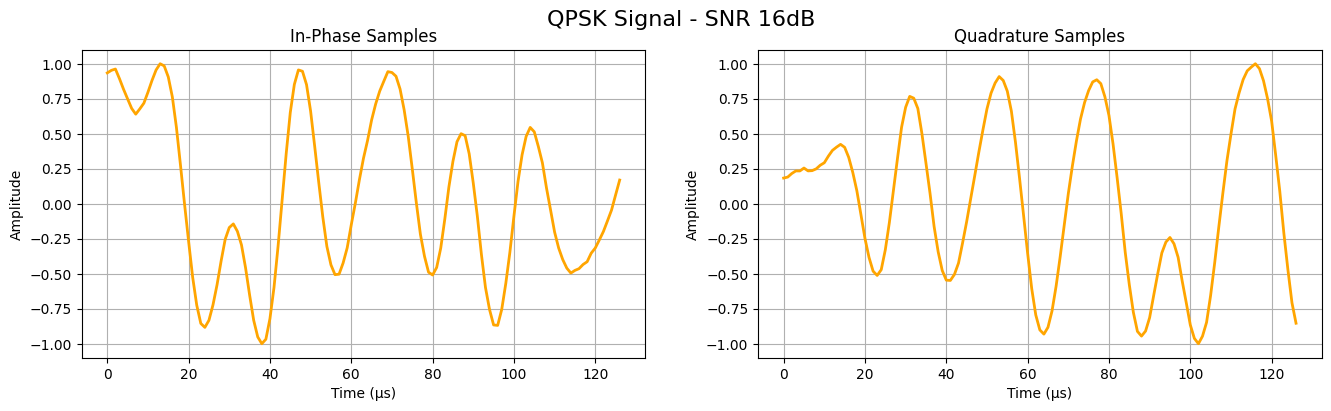

In [4]:
#fig, axs = plt.subplots(2, 1, figsize=(8, 10))
fig, axs = plt.subplots(1,2, figsize=(16, 4))

mod_QPSK = dataModulations[dataModulations['257'] == 'QPSK'].iloc[5]

I_samples = mod_QPSK[0:127].values
Q_samples = mod_QPSK[128:255].values
SNR = mod_QPSK[256]

# Normalize I and Q samples between -1 and 1
I_samples = 2 * (I_samples - I_samples.min()) / (I_samples.max() - I_samples.min()) - 1
Q_samples = 2 * (Q_samples - Q_samples.min()) / (Q_samples.max() - Q_samples.min()) - 1

axs[0].plot(I_samples, color='orange', linewidth=2)
axs[0].set_title('In-Phase Samples')
axs[0].set_xlabel('Time (μs)')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

axs[1].plot(Q_samples, color='orange', linewidth=2)
axs[1].set_title('Quadrature Samples')
axs[1].set_xlabel('Time (μs)')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)


fig.suptitle(f'QPSK Signal - SNR {SNR}dB', fontsize=16)  # Use suptitle for the figure title

plt.show()

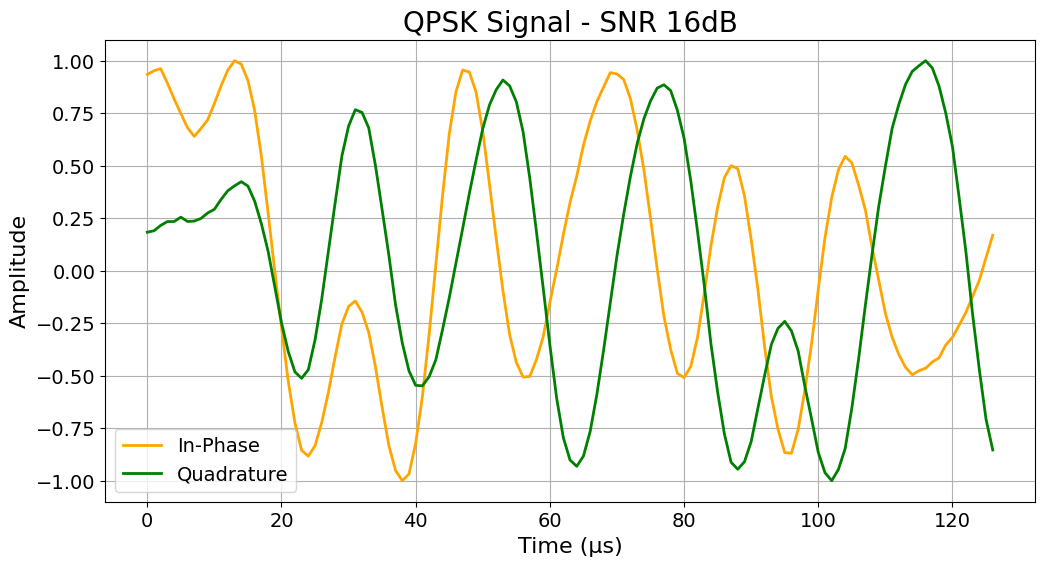

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(I_samples, color='orange', linewidth=2, label='In-Phase')
ax.plot(Q_samples, color='green', linewidth=2, label='Quadrature')

ax.set_title(f'QPSK Signal - SNR {SNR}dB', fontsize=20)  # Título principal más grande
ax.set_xlabel('Time (μs)', fontsize=16)  # Título del eje X más grande
ax.set_ylabel('Amplitude', fontsize=16)  # Título del eje Y más grande
ax.tick_params(axis='both', labelsize=14)  # Números en los ejes más grandes
ax.grid(True)

ax.legend(fontsize=14)

plt.show()

# Constellation Diagram

By plotting the In-Phase vs Quadrature components we get the **constelation diagram**, and we can get a sense of the different shapes of the modulations we are working on.


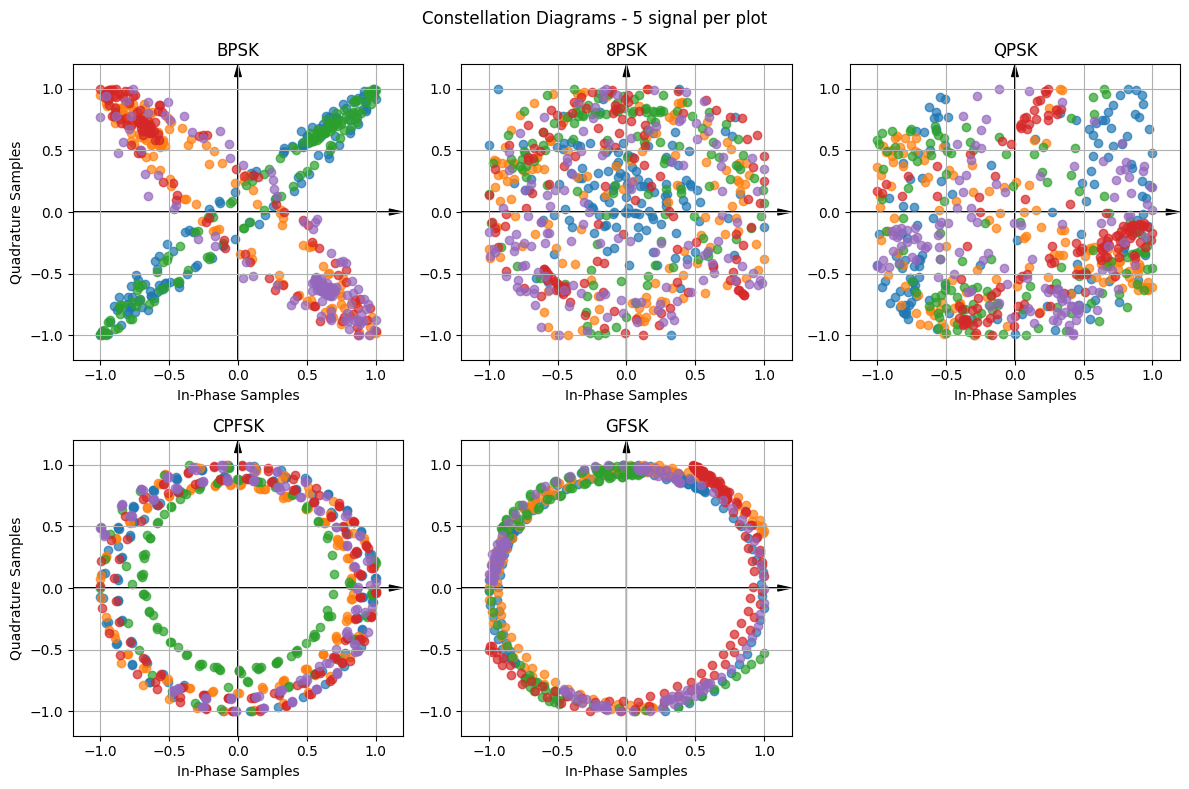

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns
fig.delaxes(axs[1, 2])

mods = ['BPSK', '8PSK', 'QPSK', 'CPFSK', 'GFSK']
snr_value = 18
num_examples = 5

# Iterate over each axis and title
for i, ax in enumerate(axs.flat):
    if i < len(mods):
        ax.set_title(mods[i])
        ax.set_xlabel('In-Phase Samples')
        if i == 0 or i == 3:
          ax.set_ylabel('Quadrature Samples')
        # Add arrows for axis (centered)
        ax.arrow(-1.2, 0, 2.3, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', linewidth=0.8)
        ax.arrow(0, -1.2, 0, 2.3, head_width=0.05, head_length=0.1, fc='black', ec='black', linewidth=0.8)
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        ax.grid(True)

        mod_data = dataModulations[(dataModulations['257'] == mods[i]) & (dataModulations['256'] == snr_value)].head(num_examples)
        for i, row in mod_data.iterrows():
          I_samples = row[0:127].values
          Q_samples = row[128:255].values

          I_samples = 2 * (I_samples - I_samples.min()) / (I_samples.max() - I_samples.min()) - 1
          Q_samples = 2 * (Q_samples - Q_samples.min()) / (Q_samples.max() - Q_samples.min()) - 1

          ax.scatter(I_samples, Q_samples, alpha = 0.7)

    else:
        ax.axis('off')
fig.suptitle(f'Constellation Diagrams - {num_examples} signal per plot', fontsize=12)  # Use suptitle for the figure title

plt.tight_layout()
plt.show()


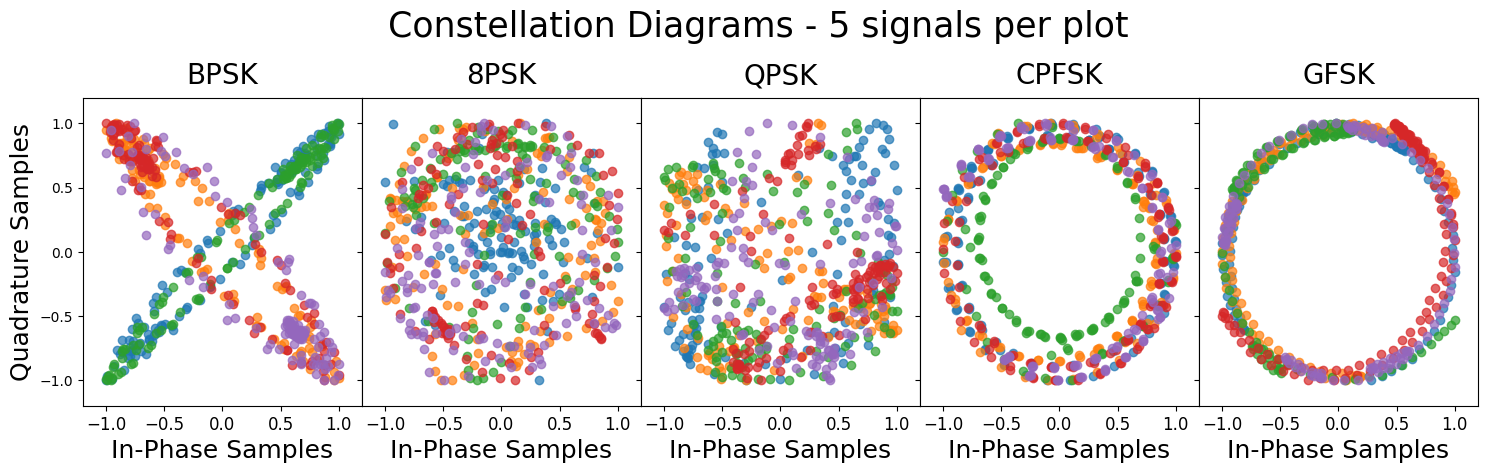

In [7]:
fig, axs = plt.subplots(1, 5, figsize=(18, 4), gridspec_kw={'wspace': 0, 'hspace': 0})  # No space between plots

mods = ['BPSK', '8PSK', 'QPSK', 'CPFSK', 'GFSK']
snr_value = 18
num_examples = 5

# Iterate over each axis and title
for i, ax in enumerate(axs.flat):
    ax.set_title(mods[i], fontsize=20, pad=10)  # Increase padding to separate titles from plots
    ax.set_xlabel('In-Phase Samples', fontsize=18)

    if i == 0:  # Add ylabel only for the first plot
        ax.set_ylabel('Quadrature Samples', fontsize=18)
    else:
        ax.tick_params(labelleft=False)  # Remove Y-axis numbers for other plots

    # Increase font size for X-axis tick labels
    ax.tick_params(axis='x', labelsize=12)

    # Adjust plot limits
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)

    # Filter data for the current modulation
    mod_data = dataModulations[(dataModulations['257'] == mods[i]) & (dataModulations['256'] == snr_value)].head(num_examples)

    for j, row in mod_data.iterrows():
        I_samples = row[0:127].values
        Q_samples = row[128:255].values

        # Normalize to [-1, 1]
        I_samples = 2 * (I_samples - I_samples.min()) / (I_samples.max() - I_samples.min()) - 1
        Q_samples = 2 * (Q_samples - Q_samples.min()) / (Q_samples.max() - Q_samples.min()) - 1

        ax.scatter(I_samples, Q_samples, alpha=0.7)

# Adjust the position of the general title
fig.suptitle(
    f'Constellation Diagrams - {num_examples} signals per plot',
    fontsize=25,
    y=1.1  # Move the general title higher
)

plt.subplots_adjust(wspace=0.1, hspace=0)  # Adjust space between subplots
plt.show()


# I/Q Samples in Time

**We could also visualize each signal in 3D (In-Phase vs Quadrature vs Time):**

In this plot we can visualize how the In-Phase and Quadrature samples progress over time.

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

mod_types = ['BPSK', '8PSK', 'QPSK', 'CPFSK', 'GFSK']
snr_value = 18  # Choose a fixed SNR value for all modulation types

fig = make_subplots(
    rows=2, cols=3,  # Adjust rows and cols for layout
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}, None]],
    subplot_titles=mod_types
)

for idx, mod_type in enumerate(mod_types):
    row = idx // 3 + 1
    col = idx % 3 + 1

    mod = dataModulations[(dataModulations['257'] == mod_type) & (dataModulations['256'] == snr_value)].iloc[0]

    I_samples = mod[0:127].values
    Q_samples = mod[128:255].values
    I_samples = 2 * (I_samples - I_samples.min()) / (I_samples.max() - I_samples.min()) - 1
    Q_samples = 2 * (Q_samples - Q_samples.min()) / (Q_samples.max() - Q_samples.min()) - 1
    time = np.arange(0, 127)

    # Add the 3D scatter plot for this modulation type to the figure
    fig.add_trace(
        go.Scatter3d(
            x=time,
            y=I_samples,
            z=Q_samples,
            mode='markers',
            marker=dict(
                size=5,
                color=I_samples,  # Color by In-phase samples
                colorscale='Portland',
                opacity=0.8
            )
        ),
        row=row,
        col=col
    )

# Update layout for each subplot
for idx, mod_type in enumerate(mod_types):
    scene_id = f"scene{idx + 1}"  # Plotly uses scene1, scene2, etc., for 3D subplots
    fig.update_layout(
        **{
            scene_id: dict(
                xaxis=dict(title='μs', range=[0, 128]),
                yaxis=dict(title='I', range=[-1, 1]),
                zaxis=dict(title='Q', range=[-1, 1]),
                camera=dict(
                   eye=dict(x=1.7, y=-1.7, z=0.7)  # Adjust the camera view
                )
            )
        }
    )

# General figure layout settings
fig.update_layout(
    title='3D Scatter Plots of Modulation Types',
    height=1000,
    width=1400,
    showlegend=False

)

fig.show()

# How does SNR affects the signal?
Let us inspect what are the noise levels present in the dataset and how much affects the signals.

In [10]:
modulation_schemes = ['QPSK', '8PSK', 'BPSK', 'CPFSK', 'GFSK']
summary_data = []

# Loop through each modulation scheme, filter data, and compute statistics
for modulation in modulation_schemes:
    mod_data = dataModulations[dataModulations['257'] == modulation]

    snr_stats = mod_data['256'].describe()

    summary_data.append({
        'Modulation': modulation,
        'Min': snr_stats['min'],
        'Max': snr_stats['max'],
        'Mean': snr_stats['mean']
    })

summary_df = pd.DataFrame(summary_data)

display(summary_df)


,Modulation,Min,Max,Mean
0,QPSK,10.0,18.0,14.627500
1,8PSK,10.0,18.0,14.680000
2,BPSK,10.0,18.0,14.639167
3,CPFSK,10.0,18.0,14.725000
4,GFSK,10.0,18.0,14.630833


We can see that for all modulations schemes the SNR goes from 10dB to 18dB. We can inspect how much does these levels affect the signal.

**Let us compare a GFSK signal with 10dB of SNR vs 18dB of SNR:**

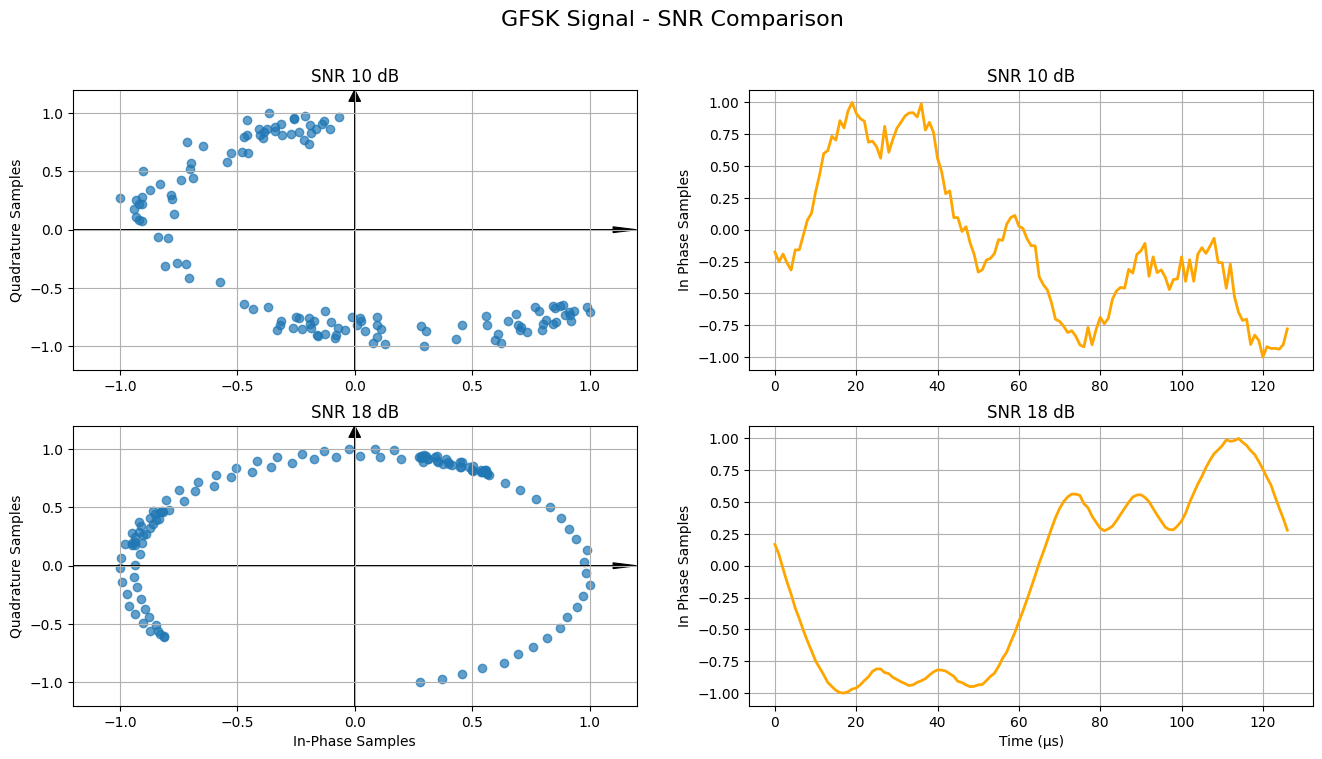

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

mod_type = 'GFSK'

# 10 dB SNR
mod_10 = dataModulations[(dataModulations['257'] == mod_type) & (dataModulations['256'] == 10)].iloc[0]

I_samples_10 = mod_10[0:127].values
Q_samples_10 = mod_10[128:255].values

I_samples_10 = 2 * (I_samples_10 - I_samples_10.min()) / (I_samples_10.max() - I_samples_10.min()) - 1
Q_samples_10 = 2 * (Q_samples_10 - Q_samples_10.min()) / (Q_samples_10.max() - Q_samples_10.min()) - 1

# 18 dB SNR
mod_18 = dataModulations[(dataModulations['257'] == mod_type) & (dataModulations['256'] == 18)].iloc[0]

I_samples_18 = mod_18[0:127].values
Q_samples_18 = mod_18[128:255].values

# Normalize I and Q samples between -1 and 1
I_samples_18 = 2 * (I_samples_18 - I_samples_18.min()) / (I_samples_18.max() - I_samples_18.min()) - 1
Q_samples_18 = 2 * (Q_samples_18 - Q_samples_18.min()) / (Q_samples_18.max() - Q_samples_18.min()) - 1

axs[0,0].scatter(I_samples_10, Q_samples_10, alpha = 0.7)
axs[0,0].arrow(-1.2, 0, 2.3, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', linewidth=0.8)
axs[0,0].arrow(0, -1.2, 0, 2.3, head_width=0.05, head_length=0.1, fc='black', ec='black', linewidth=0.8)
axs[0,0].set_xlim(-1.2, 1.2)
axs[0,0].set_ylim(-1.2, 1.2)
axs[0,0].set_title('SNR 10 dB')
axs[0,0].set_ylabel('Quadrature Samples')
axs[0,0].grid(True)

axs[0,1].plot(I_samples_10, color='orange', linewidth=2)
axs[0,1].set_title('SNR 10 dB')
axs[0,1].set_ylabel('In Phase Samples')
axs[0,1].grid(True)

axs[1,0].scatter(I_samples_18, Q_samples_18, alpha = 0.7)
axs[1,0].arrow(-1.2, 0, 2.3, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', linewidth=0.8)
axs[1,0].arrow(0, -1.2, 0, 2.3, head_width=0.05, head_length=0.1, fc='black', ec='black', linewidth=0.8)
axs[1,0].set_xlim(-1.2, 1.2)
axs[1,0].set_ylim(-1.2, 1.2)
axs[1,0].set_title('SNR 18 dB')
axs[1,0].set_xlabel('In-Phase Samples')
axs[1,0].set_ylabel('Quadrature Samples')
axs[1,0].grid(True)

axs[1,1].plot(I_samples_18, color='orange', linewidth=2)
axs[1,1].set_title('SNR 18 dB')
axs[1,1].set_ylabel('In Phase Samples')
axs[1,1].grid(True)
axs[1,1].set_xlabel('Time (μs)')


fig.suptitle(f'{mod_type} Signal - SNR Comparison', fontsize=16)  # Use suptitle for the figure title

plt.show()


We can see clearly that the SNR reduces as the noise in the channel corrupts the signals.

# Is the data set balanced?

Let us inspect if the data set is balanced for all the classes.

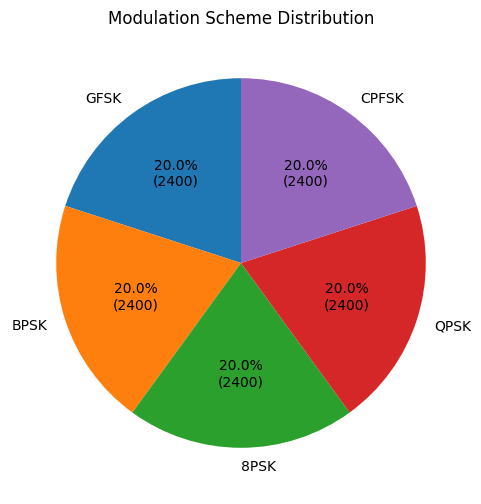

In [12]:
# Calculate the modulation distribution
modulation_distribution = dataModulations['257'].value_counts()

# Custom autopct to display percentage and count
def autopct_format(pct, total_counts):
    absolute = int(round(pct / 100.0 * total_counts))
    return f'{pct:.1f}%\n({absolute})'

# Generate the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    modulation_distribution,
    labels=modulation_distribution.index,
    autopct=lambda pct: autopct_format(pct, modulation_distribution.sum()),
    startangle=90
)
plt.title('Modulation Scheme Distribution')
plt.show()


We can see that the dataset is well balanced.

# Is the data linearly separable?

Let's visually check with MDA how separable are the classes.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataModulations = pd.read_csv(trainDataset)
dataModulations.drop(columns = ['Unnamed: 0'], inplace = True)
#df_info = dataModulations.info()
#df_head = dataModulations.head()

In [14]:
#Extract features and target
X = dataModulations.iloc[:,0:257]
y = dataModulations.iloc[:,257]

#Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X.shape, y.shape

((12000, 257), (12000,))

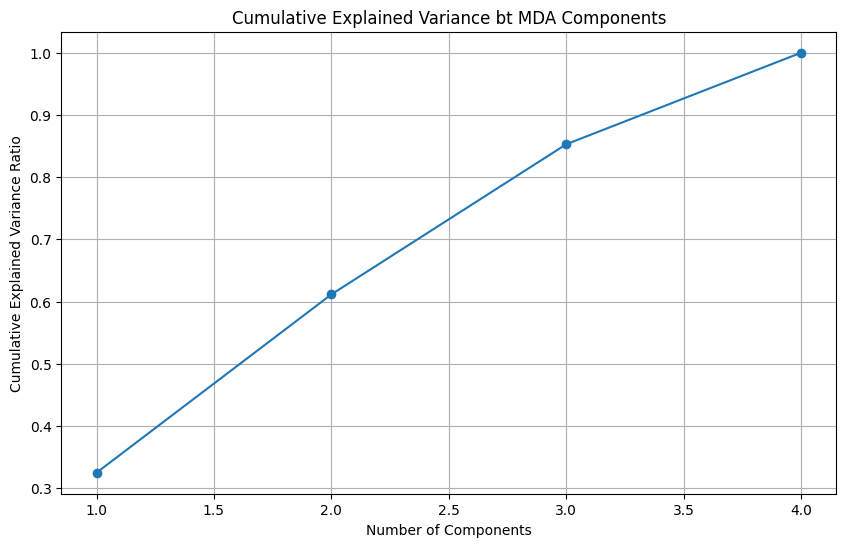

Explained variance ratio per component: [0.32496761 0.28657288 0.24129566 0.14716384]
Cumulative explained variance: [0.32496761 0.6115405  0.85283616 1.        ]


In [15]:
#Fit MDA
mda = LinearDiscriminantAnalysis()
mda.fit(X, y)

#Plot explained variance
explained_variance_ratio = mda.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize = (10,6))
plt.plot(range(1,len(explained_variance_ratio)+1),cumulative_variance, marker = 'o')
plt.title('Cumulative Explained Variance bt MDA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Print explained variance ratios
print('Explained variance ratio per component:', explained_variance_ratio)
print('Cumulative explained variance:', cumulative_variance)

In [16]:
n = 3
#MDA Analysis
mda = LinearDiscriminantAnalysis(n_components=n)
mda.fit(X, y)
X_MDA = mda.transform(X)
X_MDA.shape

(12000, 3)

In [17]:
import plotly.express as px

# Convert to a DataFrame for Plotly
df_MDA = pd.DataFrame(X_MDA, columns=['Component 1', 'Component 2', 'Component 3'])
df_MDA['Modulation'] = y

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(
    df_MDA,
    x='Component 1',
    y='Component 2',
    z='Component 3',
    color='Modulation',
    title=' 3D MDA Projection of Modulation Schemes',
    opacity=0.7
)

fig.update_layout(
    width=800,  # Set figure width in pixels
    height=800,  # Set figure height in pixels
)

# Show the interactive plot
fig.show()




We can check that the using this dimentionality reduction technique, despite having more than 85% of cumulative explained variance, the majority of data points for all classes are clustered in the same space, indicating the need for algorithms that are powerful enough to capture non linear patterns in the data